## Script for light curves visualizations
We created this script with purpose of visualize synthetic light curves.
Content:
* Environment setup
* Visualizations of overcontact light curves
* Visualizations of detached loght curves

## 1. Environment set-up
* Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randint
from ast import literal_eval

* Defining functions for noise generation, set-up of random sigma value generator.
* Inputs:
    * for function generate_observation_sigma(space_obs_frac=0.5) - space_obs_frac=0.5
    * for function stochastic_noise_generator(curve) - vector of light curve

In [5]:
def generate_observation_sigma(space_obs_frac=0.5):
    """
    Draws a standard deviation of noise in light curve points from a "true" value provided in synthetic light curve.
    Noise sigma is drawn from bimodal distribution taking into account contributions from space based and earth based
    observations which have different levels of stochastic noise.

    :param space_obs_frac: ratio between earth based and space based observations
    :return: float; standard deviation of the light curve noise
    """
    earth_based_sigma = 4e-3
    space_based_sigma = 2e-4
    sigma = np.random.choice([earth_based_sigma, space_based_sigma], p=[1-space_obs_frac, space_obs_frac])
    return np.random.rayleigh(sigma)

def stochastic_noise_generator(curve):
    """
    Introduces gaussian noise into synthetic observation provided in `curve`.

    :param curve: numpy.array; normalized light curve
    :return: Tuple(numpy.array, float); normalized light curve with added noise, standard deviation of observations
    """
    sigma = generate_observation_sigma()
    return np.random.normal(curve, sigma), np.full(curve.shape, sigma)

## 2. Data loading of overcontact synthetic light curves
* First we lad synthetic dataset. Then we create numpy array of light curves vectors and add noise to it.

In [7]:
data1 = pd.read_pickle("overcontact_all_parameters.pkl").reset_index()
data_over = data1.sample(n=100)

X_over=[]
for row in data_over["curve"]:
    X_over.append(row)
X_over=np.array(X_over)

X_over_n=[]
for i in range(len(data_over)):
    for j in range(3):
        curve=stochastic_noise_generator(X_over[i])
        X_over_n.append(curve[0])

* We plot random 100 light curves - without noise.

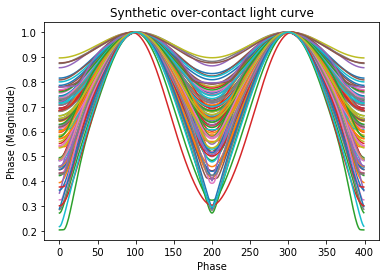

In [19]:
for i in range(100):
    rnd = randint(0, 99)
    plt.plot(X_over[i])
plt.title('Synthetic over-contact light curve')
plt.xlabel("Phase")
plt.ylabel("Phase (Magnitude)")
plt.show()

* We plot random 100 light curves - with noise.

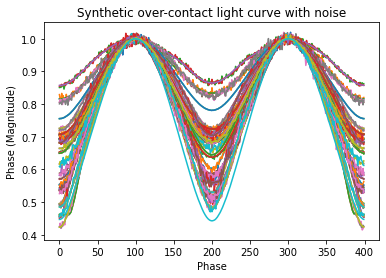

In [20]:
for i in range(100):
    rnd = randint(0, 99)
    plt.plot(X_over_n[i])
plt.title('Synthetic over-contact light curve with noise')
plt.xlabel("Phase")
plt.ylabel("Phase (Magnitude)")
plt.show()

## 2. Data loading of detached synthetic light curves
* First we lad synthetic dataset. Then we create numpy array of light curves vectors and add noise to it.

In [22]:
data2 = pd.read_pickle("detached_all_parameters.pkl").reset_index()
data_det = data2.sample(n=100)

X_det=[]
for row in data_det["curve"]:
    X_det.append(row)
X_det=np.array(X_det)

X_det_n=[]
for i in range(len(data_det)):
    for j in range(3):
        curve=stochastic_noise_generator(X_det[i])
        X_det_n.append(curve[0])

* We plot random 100 light curves - without noise.

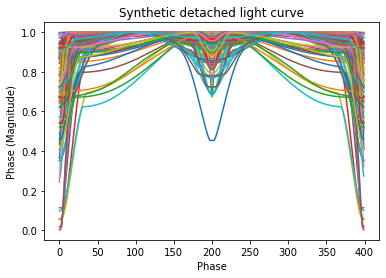

In [23]:
for i in range(100):
    rnd = randint(0, 99)
    plt.plot(X_det[i])
plt.title('Synthetic detached light curve')
plt.xlabel("Phase")
plt.ylabel("Phase (Magnitude)")
plt.show()

* We plot random 100 light curves - with noise.

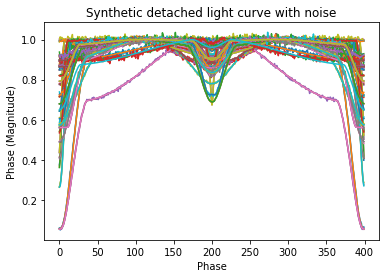

In [24]:
for i in range(100):
    rnd = randint(0, 99)
    plt.plot(X_det_n[i])
plt.title('Synthetic detached light curve with noise')
plt.xlabel("Phase")
plt.ylabel("Phase (Magnitude)")
plt.show()